# MIT Week Competitions - Data Analyst Code Challenge
## Json Team
- 2009106110 Erick Apriansyah
- 2009106115 Ahmad Riadi
- 2009106146 Tjeng, Ivan Cahyadi
---

### **Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Import Library**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Baca Dataset**

In [5]:
cnn_dataset = pd.read_csv('/content/drive/MyDrive/School/MIT-DACC-Json_Team/CNNIndonesia.csv')
detikcom_dataset = pd.read_csv('/content/drive/MyDrive/School/MIT-DACC-Json_Team/detikcom.csv')
idntimes_dataset = pd.read_csv('/content/drive/MyDrive/School/MIT-DACC-Json_Team/idntimes.csv')
kompascom_dataset = pd.read_csv('/content/drive/MyDrive/School/MIT-DACC-Json_Team/kompascom.csv')
kumparan_dataset = pd.read_csv('/content/drive/MyDrive/School/MIT-DACC-Json_Team/kumparan.csv')
liputan6_dataset = pd.read_csv('/content/drive/MyDrive/School/MIT-DACC-Json_Team/liputan6dotcom.csv')
okezonenews_dataset = pd.read_csv('/content/drive/MyDrive/School/MIT-DACC-Json_Team/okezonenews.csv')

### **Gabung Dataset**

In [6]:
indonesia_news_dataset = pd.concat([cnn_dataset, detikcom_dataset, idntimes_dataset, kompascom_dataset, kumparan_dataset, liputan6_dataset, okezonenews_dataset])
indonesia_news_dataset.head()

,Unnamed: 0,id,conversation_id,created_at,date,time,timezone,user_id,username,name,...,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,video,thumbnail,reply_to
0,0,1349297781492441090,1349297781492441090,2021-01-13 17:10:34 WIB,2021-01-13,17:10:34,700,17128975,cnnindonesia,CNN Indonesia,...,0,1,4,[],[],https://twitter.com/CNNIndonesia/status/134929...,False,0,NaN,[]
1,1,1349297025716678663,1349297025716678663,2021-01-13 17:07:34 WIB,2021-01-13,17:07:34,700,17128975,cnnindonesia,CNN Indonesia,...,1,1,6,[],[],https://twitter.com/CNNIndonesia/status/134929...,False,0,NaN,[]
2,2,1349296269127081987,1349296269127081987,2021-01-13 17:04:33 WIB,2021-01-13,17:04:33,700,17128975,cnnindonesia,CNN Indonesia,...,7,1,9,[],[],https://twitter.com/CNNIndonesia/status/134929...,False,0,NaN,[]
3,3,1349295513451917313,1349295513451917313,2021-01-13 17:01:33 WIB,2021-01-13,17:01:33,700,17128975,cnnindonesia,CNN Indonesia,...,0,7,14,[],[],https://twitter.com/CNNIndonesia/status/134929...,False,0,NaN,[]
4,4,1349294757336346625,1349294757336346625,2021-01-13 16:58:33 WIB,2021-01-13,16:58:33,700,17128975,cnnindonesia,CNN Indonesia,...,1,2,1,[],[],https://twitter.com/CNNIndonesia/status/134929...,False,0,NaN,[]


### **Informasi Dataset**

In [ ]:
indonesia_news_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891221 entries, 0 to 136114
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       891221 non-null  int64 
 1   id               891221 non-null  int64 
 2   conversation_id  891221 non-null  int64 
 3   created_at       891221 non-null  object
 4   date             891221 non-null  object
 5   time             891221 non-null  object
 6   timezone         891221 non-null  int64 
 7   user_id          891221 non-null  int64 
 8   username         891221 non-null  object
 9   name             891221 non-null  object
 10  tweet            891221 non-null  object
 11  language         891221 non-null  object
 12  mentions         891221 non-null  object
 13  urls             891221 non-null  object
 14  photos           891221 non-null  object
 15  replies_count    891221 non-null  int64 
 16  retweets_count   891221 non-null  int64 
 17  likes_coun

### **Drop Unused Columns**

In [ ]:
indonesia_news_dataset.drop(['Unnamed: 0',
                             'id',
                             'conversation_id',
                             'created_at',
                             'timezone',
                             'user_id',
                             'username',
                             'tweet',
                             'urls',
                             'photos',
                             'cashtags',
                             'link',
                             'retweet',
                             'thumbnail',
                             'reply_to'],
                            axis=1,
                            inplace=True)
indonesia_news_dataset.head()


,date,time,name,language,mentions,replies_count,retweets_count,likes_count,hashtags,video
0,2021-01-13,17:10:34,CNN Indonesia,in,[],0,1,4,[],0
1,2021-01-13,17:07:34,CNN Indonesia,in,[],1,1,6,[],0
2,2021-01-13,17:04:33,CNN Indonesia,in,[],7,1,9,[],0
3,2021-01-13,17:01:33,CNN Indonesia,in,[],0,7,14,[],0
4,2021-01-13,16:58:33,CNN Indonesia,in,[],1,2,1,[],0


untuk kolom diatas menghapus id,conversation_id itu merupakan nilai yang tidak bisa dianalisis karena hanya merupakan id dan antara conversation_id dan id memiliki nilai yang sama. urls,photos,link dihapus karena hanya berisi link yang tidak dapat ditarik kesimpulannya. cashtag dihapus karena tidak memiliki nilai/values.sedangkan untuk thumbnail dihapus karena memiliki banyak data yang bersifat null. dan untuk retweets hanya memiliki satu nilai yaitu false

### **[Palet Warna](https://assets-global.website-files.com/620d42e86cb8ec4d0839e59d/620d42e96cb8ec4eda39f743_dUfQX7mnoDJATqLQSu8A3GtFEEWmQW4XEIthAcKhd_pRETmxqK_zfE6K1VtgRP-drDr7JdD33ye62gjf-D477CKDFJSKasbILdHjJiG_7GD9zRPw8zcJJIOIyCyMRepVOdJ4rvjj.png)**

In [8]:
first_color = '#E60049'
second_color = '#0BB4FF'
third_color = '#50E991'
fourth_color = '#E6D800'
fifth_color = '#9B19F5'
sixth_color = '#FFA300'
seventh_color = '#DC0AB4'
eighth_color = '#B3D4FF'
ninth_color = '#00BFA0'

### **Rata-Rata Jumlah Berita Perhari**

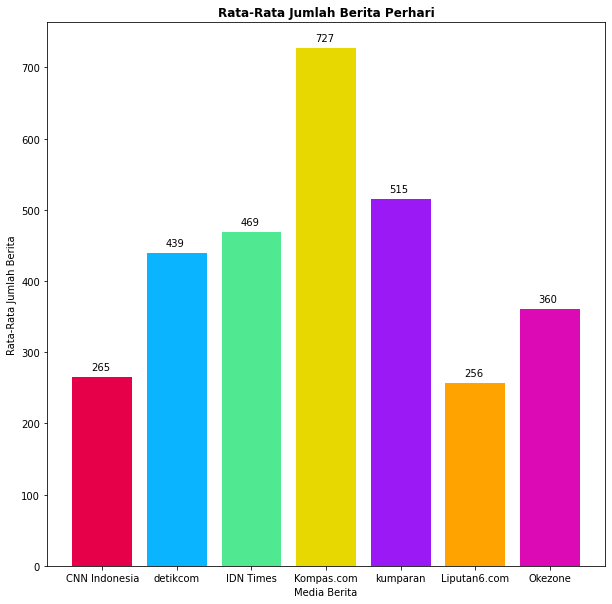

In [25]:
media_berita = indonesia_news_dataset['name'].unique()
rata_rata_jumlah_berita = [cnn_dataset['date'].value_counts().sum() // len(cnn_dataset['date'].value_counts()),
                           detikcom_dataset['date'].value_counts().sum() // len(detikcom_dataset['date'].value_counts()),
                           idntimes_dataset['date'].value_counts().sum() // len(idntimes_dataset['date'].value_counts()),
                           kompascom_dataset['date'].value_counts().sum() // len(kompascom_dataset['date'].value_counts()),
                           kumparan_dataset['date'].value_counts().sum() // len(kumparan_dataset['date'].value_counts()),
                           liputan6_dataset['date'].value_counts().sum() // len(liputan6_dataset['date'].value_counts()),
                           okezonenews_dataset['date'].value_counts().sum() // len(okezonenews_dataset['date'].value_counts())]

plt.figure(figsize=(10,10))
plt.bar(media_berita,
        rata_rata_jumlah_berita,
        color=[first_color,
               second_color,
               third_color,
               fourth_color,
               fifth_color,
               sixth_color,
               seventh_color])
plt.title("Rata-Rata Jumlah Berita Perhari", fontweight='bold')
plt.xlabel("Media Berita")
plt.ylabel("Rata-Rata Jumlah Berita")

for index, value in enumerate(rata_rata_jumlah_berita):
    plt.text(index - .15, value + 10, str(value))

plt.show()

Dari analisis diatas, bisa disimpulkan kompas.com memiliki rata-rata hariannya untuk berita diupload sebanyak 727 berita. dan untuk liputan6 menjadi media berita yang kurang mengeluarkan berita paling sedikit perharinya dengan rata-ratanya hanya 256 berita.

### **Bahasa yang Digunakan pada Berita**

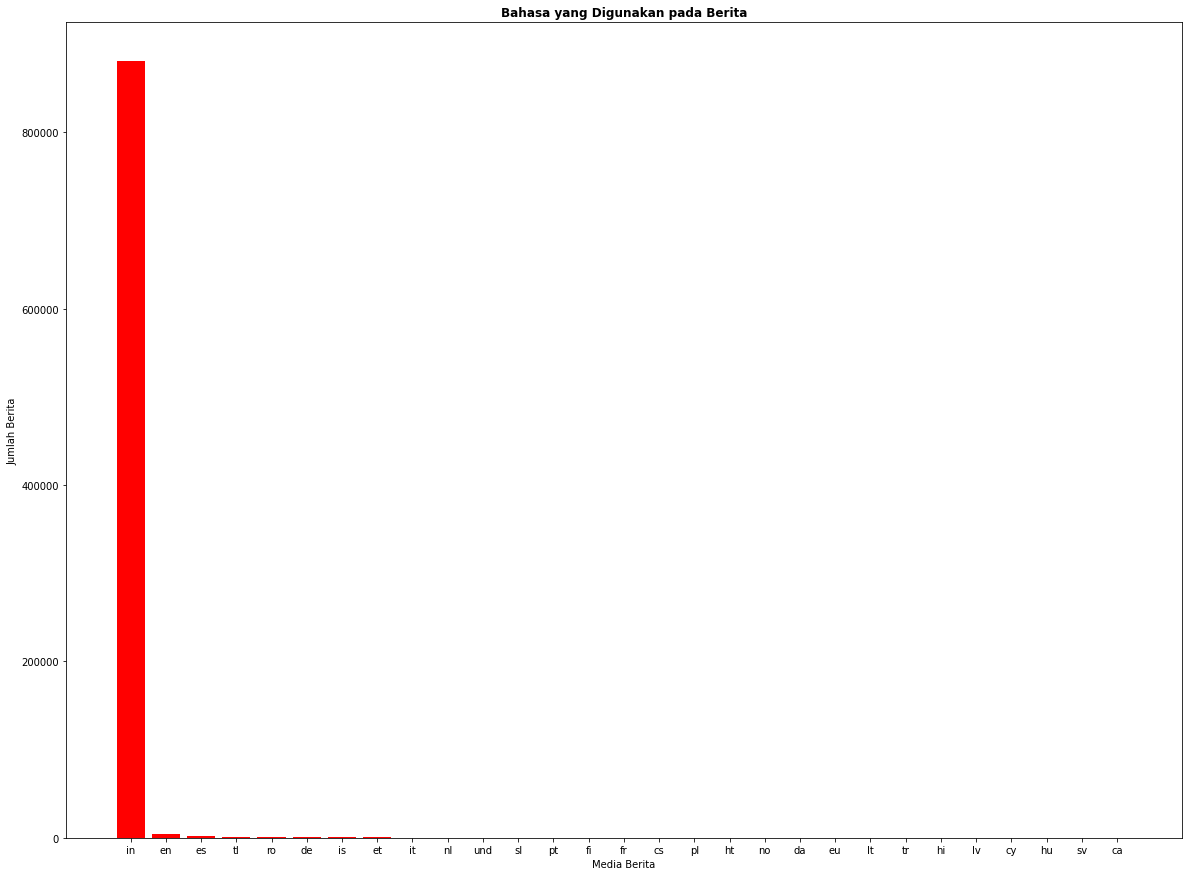

In [31]:
plt.figure(figsize=(20,15))
plt.bar(indonesia_news_dataset['language'].unique(),
        indonesia_news_dataset['language'].value_counts(),
        color='red')
plt.title("Bahasa yang Digunakan pada Berita", fontweight='bold')
plt.xlabel("Media Berita")
plt.ylabel("Jumlah Berita")

plt.show()

Grafik menunjukkan bahwa bahasa yang paling banyak digunakan untuk berita adalah bahasa Indonesia, diikuti dengan bahasa Inggris kemudian bahasa Spanyol.

### **Jumlah Retweet Berita**

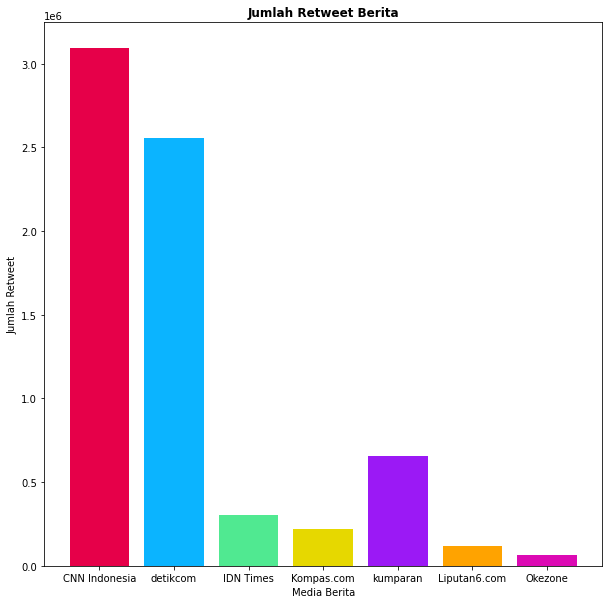

In [33]:
plt.figure(figsize=(10,10))
plt.bar(media_berita,
        [cnn_dataset['retweets_count'].sum(),
         detikcom_dataset['retweets_count'].sum(),
         idntimes_dataset['retweets_count'].sum(),
         kompascom_dataset['retweets_count'].sum(),
         kumparan_dataset['retweets_count'].sum(),
         liputan6_dataset['retweets_count'].sum(),
         okezonenews_dataset['retweets_count'].sum()],
        color=[first_color,
               second_color,
               third_color,
               fourth_color,
               fifth_color,
               sixth_color,
               seventh_color])
plt.title("Jumlah Retweet Berita", fontweight='bold')
plt.xlabel("Media Berita")
plt.ylabel("Jumlah Retweet")

plt.show()

Dari grafik diatas, dapat disimpulkan bahwa berita yang sering diretweet oleh para pembaca berita adalah dari CNN Indonesia. Sedangkan yang paling sedikit adalah Okezone.

### **Jumlah Like Berita**

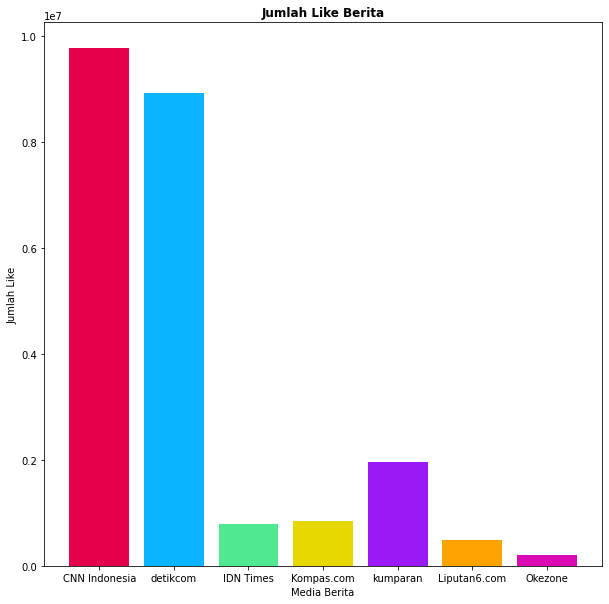

In [38]:
plt.figure(figsize=(10,10))
plt.bar(media_berita,
        [cnn_dataset['likes_count'].sum(),
         detikcom_dataset['likes_count'].sum(),
         idntimes_dataset['likes_count'].sum(),
         kompascom_dataset['likes_count'].sum(),
         kumparan_dataset['likes_count'].sum(),
         liputan6_dataset['likes_count'].sum(),
         okezonenews_dataset['likes_count'].sum()],
        color=[first_color,
               second_color,
               third_color,
               fourth_color,
               fifth_color,
               sixth_color,
               seventh_color])
plt.title("Jumlah Like Berita", fontweight='bold')
plt.xlabel("Media Berita")
plt.ylabel("Jumlah Like")

plt.show()

Dari grafik diatas, dapat disimpulkan bahwa berita yang banyak di like oleh para pembaca berita adalah dari CNN Indonesia. Sedangkan yang paling sedikit adalah Okezone.

### **Jumlah Reply Berita**

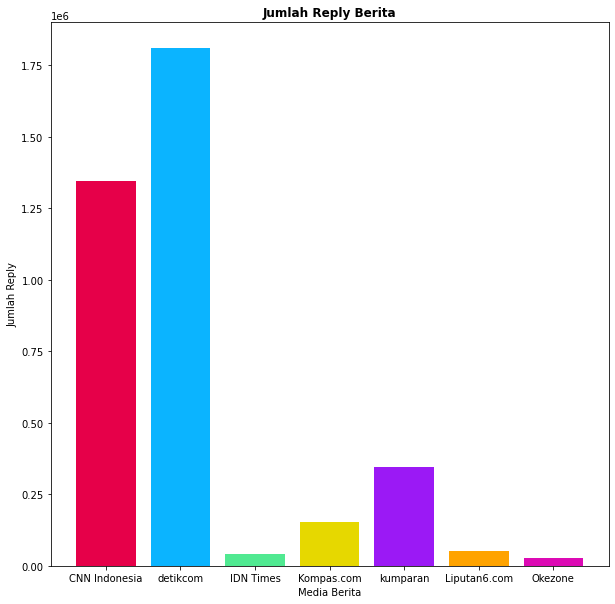

In [37]:
plt.figure(figsize=(10,10))
plt.bar(media_berita,
        [cnn_dataset['replies_count'].sum(),
         detikcom_dataset['replies_count'].sum(),
         idntimes_dataset['replies_count'].sum(),
         kompascom_dataset['replies_count'].sum(),
         kumparan_dataset['replies_count'].sum(),
         liputan6_dataset['replies_count'].sum(),
         okezonenews_dataset['replies_count'].sum()],
        color=[first_color,
               second_color,
               third_color,
               fourth_color,
               fifth_color,
               sixth_color,
               seventh_color])
plt.title("Jumlah Reply Berita", fontweight='bold')
plt.xlabel("Media Berita")
plt.ylabel("Jumlah Reply")

plt.show()

kesimpulan dari replies count. paling banyak dari detik, paling dikit dari okzone.

Berdasarkan grafik jumlah retweet berita, jumlah like berita, dan jumlah reply berita, dapat disimpulkan bahwa cnn sangat mendominasi unttuk retweet dan like pada artikel-artikel beritanya. Sedangkan detik mendominasi pada reply count pada artikel-artikel beritanya. Sedangkan okezone selalu terbawah dari segi like, retweet, dan replies dari kompetitornya.

### **Video**
video merupakan salah satu unsur yang sangat penting pada masa sekarang. Generasi muda sekarang lebih suka menonton video daripada membaca. Jadi dalam bagian ini kami akan menganalisis apakah sebuah stasiun itu ada menginclude kan video atau tidak, dengan parameter 0 sebagai false (tidak ada video) dan 1 sebagai true (ada video), supaya berita dapat menjangkau semua kalangan.

In [40]:
cnn_dataset['video'].value_counts()

0    92493
1     7954
Name: video, dtype: int64

In [41]:
detikcom_dataset['video'].value_counts()

0    162560
1      3909
Name: video, dtype: int64

In [42]:
idntimes_dataset['video'].value_counts()

0    165719
1     12242
Name: video, dtype: int64

In [43]:
kompascom_dataset['video'].value_counts()

0    78478
1     1522
Name: video, dtype: int64

In [44]:
kumparan_dataset['video'].value_counts()

0    126603
1      6497
Name: video, dtype: int64

In [45]:
liputan6_dataset['video'].value_counts()

0    94422
1     2707
Name: video, dtype: int64

In [46]:
okezonenews_dataset['video'].value_counts()

0    135110
1      1005
Name: video, dtype: int64

dengan melihat hasil penjabaran diatas, maka dapat ditarik kesimpulan bahwa perusahaan media berita yang paling sedikit menggunakan video untuk berita-beritanya adalah okezonenews. Sedangkan yang paling banyak menggunakan video untuk berita-beritanya adalah IDN Times.

### **Hashtag**

In [47]:
cnn_dataset['hashtags'].value_counts()

[]                                          89819
['cnnindonesia']                             3557
['dataterbarucorona', 'cnnindonesia']         702
['pilkada2020']                               484
['detiknetwork']                              466
                                            ...  
['cnnindonesia', 'sigapmembangunnegeri']        1
['covid19', 'viruscorona']                      1
['edukasikeuangan']                             1
['haornas2020', 'haornas2020']                  1
['longform', 'cnnindonesia']                    1
Name: hashtags, Length: 901, dtype: int64

pada artikel-artikel beritanya, cnn banyak yang tidak menggunakan hashtag. Ini sangat berpengaruh pada pencarian berita tersebut, karena salah satu pengaruh hashtag itu adalah memudahkan pengguna untuk mencari postingan berita tersebut.

In [48]:
detikcom_dataset['hashtags'].value_counts()

[]                                      68020
['viruscorona']                          2048
['viral']                                1411
['foto']                                  780
['coronaupdate']                          474
                                        ...  
['foto', 'belajardaring', 'sekolah']        1
['pesawat', 'madiun']                       1
['vernitasyabilla', 'prostitusi']           1
['ojol', 'pencurian']                       1
['papua', 'ulatsagu']                       1
Name: hashtags, Length: 39447, dtype: int64

detikcom lebih banyak menggunakan hashtag tentang corona virus

In [49]:
idntimes_dataset['likes_count'].value_counts()

0       101667
1        44522
2        16977
3         6862
4         3083
         ...  
764          1
469          1
8251         1
531          1
1293         1
Name: likes_count, Length: 529, dtype: int64

idntimes lebih banyak menggunakan hashtag berupa lifestyle

In [50]:
kompascom_dataset['hashtags'].value_counts()

[]                                71024
['regional']                        982
['nasional']                        951
['hype']                            759
['megapolitan']                     709
                                  ...  
['omnibuslaw', 'uuciptakerja']        1
['videokompas', 'gibran']             1
['videokompas', 'monolit']            1
['supportlokal']                      1
['jongdae']                           1
Name: hashtags, Length: 631, dtype: int64

kompas.com lebih banyak menggunakan hashtag yang berkaitan dengan geopolitik

In [51]:
kumparan_dataset['hashtags'].value_counts()

['kumparannews']                                                                 35305
['publisherstory']                                                               27063
[]                                                                               18482
['userstory']                                                                    15694
['kumparanbola']                                                                  7116
                                                                                 ...  
['nikmatinpedasnya']                                                                 1
['waktutakbisakembali', 'semangatbersama']                                           1
['lactamilmama', 'resilienttogether', 'awalyangbaik', 'mamapastisiap', 'ads']        1
['protokol']                                                                         1
['livecoronaupdate', 'kuatbersama', 'lcusandiagauno']                                1
Name: hashtags, Length: 1164, dtype: int64

kumparan lebih banyak mengangkat berita yang ditulis oleh pekerja lepas perusahaan tersebut. Karena kumparan sendiri bersifat platform media yang kolaboratif, sehingga mereka banyak mempekerjakan pekerja lepas.

In [52]:
liputan6_dataset['hashtags'].value_counts()

[]                                                                                        94427
['videoliputan6']                                                                           544
['beraniberubah', 'perubahanperilaku']                                                      345
['cekfaktahariini', 'cekfaktahariinilip6']                                                  152
['videoliputan6', 'coronacovid19']                                                          151
                                                                                          ...  
['corona', 'covid19', 'silaturahome', 'dirumahaja', 'livestreaming']                          1
['parawajahindonesia']                                                                        1
['livestreming', 'silaturahome', 'dirumahaja']                                                1
['pantun', 'livestreaming', 'silaturahome', 'dirumahaja']                                     1
['happynewyear', 'tahunbaru', 'selmattah

berita pada liputan 6 lebih banyak membahas hashtag tentang trivia-trivia atau fakta-fakta dalam kehidupan sehari-hari.

In [53]:
okezonenews_dataset['hashtags'].value_counts()

['taucepattanpabatas', 'beritaterkini', 'berita', 'news', 'beritanasional']             13431
['taucepattanpabatas', 'celebrity', 'kabarartis', 'gosip']                              12335
['taucepattanpabatas', 'keuangan', 'ekonomi', 'ekonomi', 'ekonomiindonesia']            11809
['taucepattanpabatas', 'beritaterkini', 'beritaterkini', 'newsupdate']                   8496
['taucepattanpabatas']                                                                   7258
                                                                                        ...  
['cefm_', '3eyond1magination']                                                              1
['langsungbelanja']                                                                         1
['mnc31', 'mncfest2020', '3eyond1magination', 'mnc3eyond1magination', 'hutmncgroup']        1
['jogetinaja']                                                                              1
['taucepattanpabatas', 'tahunbaruanokezone']                

okezone menggunakan hashtag-hashtag sesuai dengan beritanya, okezone juga lumayan sering menggunakan taglinenya sebagai hashtag.

kesimpulannya adalah masing-masing media mempunya ciri khas penggunaan hashtag sendiri. Hashtag sangat berpengaruh terhadap kefektifan pengguna untuk menjangkau artikel berita yang ingin ia lihat.